In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 


%matplotlib inline
import numpy as np

## Why L1 regularization gives sparse weights ?

In [ ]:
#Z = X**2 + Y**2

In [2]:
x1, y1 = np.arange(-100, 100, 1), np.arange(-100, 100, 1)
X1, Y1 = np.meshgrid(x1, y1)
Z1 = np.abs(X1) + np.abs(Y1)

In [4]:
x2, y2 = np.arange(-8+5, 8+5+16, 1), np.arange(-8, 8, 1)
X2, Y2 = np.meshgrid(x2, y2)
Z2 = (X2-5)**2 + (Y2)**2

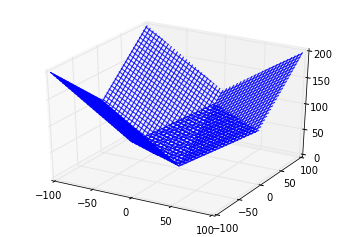

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X1, Y1, Z1, linestyles='dotted', cmap=cm.jet)
#ax.plot_wireframe(X2, Y2, Z2, linestyles='solid', color='red')

If we keep adding more contour levels on the ball we want to minimize
the first point it will touch from the L1 constraint set will likely
be a corner than ther point because they are "en avant" wheras if you
have L2 there is no reason why you would touch the point with 0 dim. 
Imagine you keep creating contours of the ball you want to minimize until
you hit the L1 shape, then it is more likely to hit a corner.

See the picture from : http://statweb.stanford.edu/~tibs/lasso/lasso.pdf (fig2) or
this video https://www.youtube.com/watch?v=sO4ZirJh9ds

## Let's compare with L2

In [7]:
from sklearn.datasets import fetch_olivetti_faces
# let's pick some "high-dimensional" 4096 dim data

In [8]:
data = fetch_olivetti_faces()
X, y = data["data"], data["target"]

In [9]:
from sklearn.linear_model import Lasso, Ridge

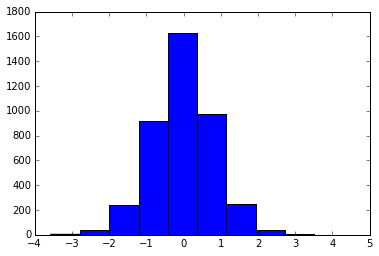

0


In [10]:
model = Ridge(alpha=0.1)
model.fit(X, y)
plt.hist(model.coef_)
plt.show()
print((model.coef_==0).sum())

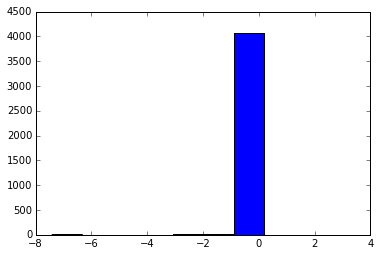

4066


In [11]:
model = Lasso(alpha=0.2)
model.fit(X, y)
plt.hist(model.coef_)
plt.show()
print((model.coef_==0).sum())

## how much alpha changes the sparsity ?

In [12]:
n = []
alphas = np.arange(1, 10)
alphas = (2**alphas).astype(np.float32)
alphas *= 0.000001

for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X, y)
    nb = 100. * float(((model.coef_)==0).sum()) / len(model.coef_)
    n.append(nb)

/home/mehdi/work/code/scikit-learn/lib/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


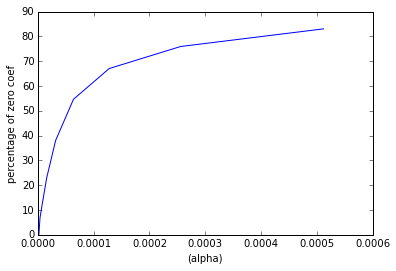

In [13]:
plt.xlabel("(alpha)")
plt.ylabel("percentage of zero coef")
plt.plot(alphas, n)

## does the curve above depend on the data ? yes (of course)

In [14]:
from lasagnekit.datasets.mnist import MNIST

In [16]:
data = MNIST()
data.load()
X, y = data.X[0:20000], data.y[0:20000]

In [17]:
n = []
alphas = np.arange(1, 10)
alphas = (2**alphas).astype(np.float32)
alphas *= 0.000001

for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X, y)
    nb = 100. * float(((model.coef_)==0).sum()) / len(model.coef_)
    n.append(nb)

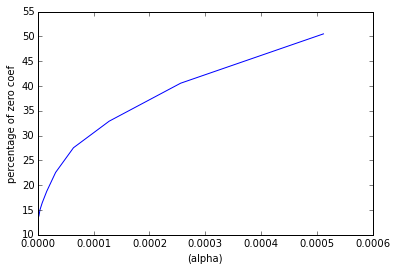

In [18]:
plt.xlabel("(alpha)")
plt.ylabel("percentage of zero coef")
plt.plot(alphas, n)

# does it depend only on the dimensionality or the dataset itself ?
# let's do an artifical experiment

In [35]:
s = []
for n in range(50, 100):
    x = np.random.uniform(0, 1, size=(100, n))
    y = x[:, 5] * 2 + x[:, 6] * 3 + x[:, 8] * 10 + x[:, 20]
    model = Lasso(alpha=0.0001)
    model.fit(x, y)
    print(model.coef_)

[-0.          0.          0.          0.          0.          1.99909845
  2.99901804  0.          9.99868162 -0.          0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.          0.
  0.9988295   0.         -0.         -0.          0.         -0.          0.
 -0.         -0.          0.         -0.         -0.          0.         -0.
  0.         -0.         -0.         -0.          0.         -0.         -0.
  0.          0.         -0.         -0.          0.         -0.          0.
 -0.         -0.        ]
[-0.          0.         -0.         -0.          0.          1.99902751
  2.99869705  0.          9.99891077  0.          0.         -0.          0.
 -0.         -0.          0.         -0.          0.          0.          0.
  0.99870118  0.          0.          0.         -0.          0.          0.
  0.         -0.         -0.          0.         -0.         -0.          0.
  0.          0.          0.         -0.         -0.      

# does not seem to depend on dimensionality of the adata, as long as you find the good alpha
# it looks like alpha is more sensitive  to the real number of "features" used,  let's try and see the relationship

In [57]:
s = []
a = 50
b = 50
x = np.random.uniform(0, 1, size=(100, a+b))
w = np.random.uniform(0, 1, size=(a+b,))
perc  = []
for n in range(1, b):
    print(x[:, 0:n].shape, w.shape)
    y = np.dot(x[:, 0:n], w[0:n])
    model = Lasso(alpha=0.0001)
    model.fit(x, y)
    print(model.coef_)
    nb = ((model.coef_)!=0).sum()
    perc.append(nb)
    

((100, 1), (100,))
[ 0.03321325  0.         -0.         -0.         -0.          0.         -0.
  0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.         -0.          0.         -0.         -0.
  0.         -0.          0.         -0.         -0.          0.          0.
 -0.         -0.          0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.          0.          0.         -0.
 -0.         -0.         -0.         -0.          0.          0.         -0.
  0.         -0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.          0.         -0.          0.         -0.
 -0.          0.          0.          0.         -0.          0.          0.
 -0.          0.         -0.          0.         -0.          0.          0.
  0.          0.         -0.          0.          0.         -0.         -0.
  0.         -0.          0.         -0.         -0.     

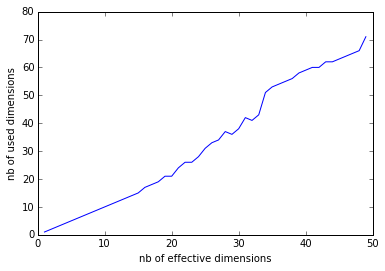

In [58]:
plt.xlabel("nb of effective dimensions")
plt.ylabel("nb of used dimensions")
plt.plot(range(1, b), perc)

## how much should we increase alpha as we increase nb of effective dimensions?

In [151]:
s = []
a = 50
b = 50

alpha = 0.00001

x = np.random.uniform(0, 1, size=(100, a+b))
w = np.random.uniform(0, 1, size=(a+b,))
perc  = []
for n in range(1, b):
    print(x[:, 0:n].shape, w.shape)
    y = np.dot(x[:, 0:n], w[0:n])
    model = Lasso(alpha=alpha)
    alpha = 0.00001 * n
    model.fit(x, y)
    print(model.coef_)
    nb = ((model.coef_)!=0).sum()
    perc.append(nb)
    

((100, 1), (100,))
[ 0.84144346 -0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.         -0.
 -0.          0.          0.          0.          0.         -0.          0.
  0.          0.          0.          0.          0.          0.         -0.
 -0.         -0.          0.          0.         -0.          0.          0.
  0.         -0.         -0.         -0.         -0.          0.          0.
  0.          0.          0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.         -0.         -0.         -0.
 -0.          0.         -0.          0.          0.         -0.          0.
  0.          0.          0.         -0.          0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.          0.
  0.          0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.          0.          0.     

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 18, 19, 21, 22, 23, 26, 27, 28, 29, 30, 32, 35, 35, 38, 40, 41, 42, 44, 46, 48, 48, 49, 51, 52, 56, 58, 63, 66, 64, 64, 69, 73]


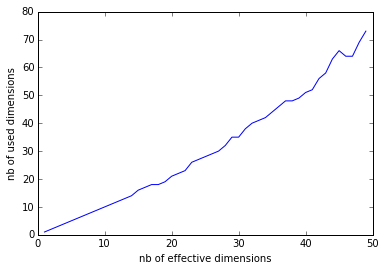

In [152]:
plt.xlabel("nb of effective dimensions")
plt.ylabel("nb of used dimensions")
plt.plot(range(1, b), perc)
print(range(1, b))
print(perc)

# Nice ! se we should rater not increase it very much !